In [294]:
import pandas as pd
import seaborn as sns

Read csv files

In [295]:
df_BTC_2017 = pd.read_csv("archive/BTC-2017min.csv")
df_BTC_2018 = pd.read_csv("archive/BTC-2018min.csv")
df_BTC_2019 = pd.read_csv("archive/BTC-2019min.csv")
df_BTC_2020 = pd.read_csv("archive/BTC-2020min.csv")
df_BTC_2021 = pd.read_csv("archive/BTC-2021min.csv")

Concat all datafremes

In [296]:
concat_BTC = pd.concat([df_BTC_2017, df_BTC_2018], axis=0)
concat_BTC = pd.concat([concat_BTC, df_BTC_2019], axis=0)
concat_BTC = pd.concat([concat_BTC, df_BTC_2020], axis=0)
concat_BTC = pd.concat([concat_BTC, df_BTC_2021], axis=0)

Sort BTC dataframe by date

In [297]:
concat_BTC["date"] = pd.to_datetime(concat_BTC["date"])
BTC_df = concat_BTC.sort_values(by="date")
BTC_df.drop(columns=["unix", "symbol"], inplace=True)

BTC_df.head()

,date,open,high,low,close,Volume BTC,Volume USD
525598,2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400
525597,2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7815.397864
525596,2017-01-01 00:03:00,966.37,966.37,966.37,966.37,0.000000,0.000000
525595,2017-01-01 00:04:00,966.37,966.37,966.37,966.37,0.000000,0.000000
525594,2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,103.408010


Cleaning Data

In [298]:
BTC_df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [299]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2675301 entries, 525598 to 0
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   open        float64       
 2   high        float64       
 3   low         float64       
 4   close       float64       
 5   Volume BTC  float64       
 6   Volume USD  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 163.3 MB


Checking for Null Values

In [300]:
print("Null values:", BTC_df.isnull().values.sum())

Null values: 0


In [301]:
print("NaN values:", BTC_df.isnull().values.any())

NaN values: False


In [302]:
#criar as funções que limpam os dados mesmo assim 

Exploratory Data Analysis

In [303]:
#print the start date and the end  date

start_date = BTC_df.iloc[0][1]
end_date = BTC_df.iloc[-1][1]

print("Start date:", start_date)
print("End date:", end_date)

Start date: 966.34
End date: 43046.58


In [304]:
BTC_df_date = BTC_df.copy()
BTC_df_date["date"] = pd.to_datetime(BTC_df_date["date"])
BTC_df_date["date"] = BTC_df_date["date"].dt.floor('H')



BTC_df_date.head()

,date,open,high,low,close,Volume BTC,Volume USD
525598,2017-01-01,966.34,966.34,966.34,966.34,7.610000,7353.847400
525597,2017-01-01,966.16,966.37,966.16,966.37,8.087376,7815.397864
525596,2017-01-01,966.37,966.37,966.37,966.37,0.000000,0.000000
525595,2017-01-01,966.37,966.37,966.37,966.37,0.000000,0.000000
525594,2017-01-01,966.43,966.43,966.43,966.43,0.107000,103.408010


In [305]:
BTC_agg = BTC_df_date.groupby("date").agg({
    "open": ['max'],
    "high": ['max'],
    "low": ['min'],
    "close": ['max'],
    "Volume BTC": ['mean'],
    "Volume USD": ['mean']
})
BTC_agg.head()

,open,high,low,close,Volume BTC,Volume USD
,max,max,min,max,mean,mean
date,,,,,,
2017-01-01 00:00:00,966.99,966.99,964.60,966.99,1.737031,1678.594542
2017-01-01 01:00:00,966.60,966.60,962.54,966.60,2.483759,2394.140661
2017-01-01 02:00:00,965.74,965.75,961.99,965.07,1.571123,1514.653480
2017-01-01 03:00:00,964.71,964.71,960.53,964.71,1.293661,1244.006219
2017-01-01 04:00:00,963.64,963.64,960.60,963.64,0.780170,750.944990


In [306]:
BTC_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in BTC_agg.columns]
BTC_agg = BTC_agg.reset_index() 

BTC_agg["horario"] = BTC_agg["date"].dt.strftime('%H')

BTC_agg.head()

,date,open_max,high_max,low_min,close_max,Volume BTC_mean,Volume USD_mean,horario
0,2017-01-01 00:00:00,966.99,966.99,964.60,966.99,1.737031,1678.594542,00
1,2017-01-01 01:00:00,966.60,966.60,962.54,966.60,2.483759,2394.140661,01
2,2017-01-01 02:00:00,965.74,965.75,961.99,965.07,1.571123,1514.653480,02
3,2017-01-01 03:00:00,964.71,964.71,960.53,964.71,1.293661,1244.006219,03
4,2017-01-01 04:00:00,963.64,963.64,960.60,963.64,0.780170,750.944990,04


['date', 'open_max', 'high_max', 'low_min', 'close_max', 'Volume BTC_mean', 'Volume USD_mean', 'horario']


<Axes: >

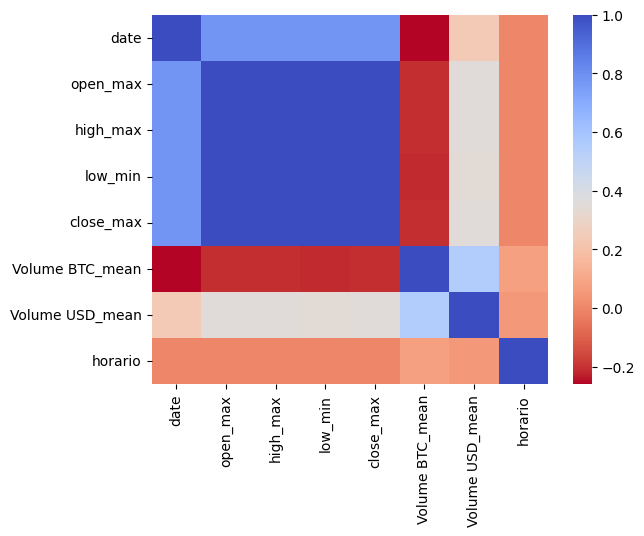

In [311]:

atributos = list(BTC_agg.columns)
print(atributos)
sns.heatmap(BTC_agg[atributos[:]].corr(), cmap='coolwarm_r')